# Midterm exam 1

There are 4 questions, each worth 25 points. Write Python code to solve each question.

Points will be deducted for 

- Functions or classes without `docstrings`
- Grossly inefficient or redundant code
- Excessively verbose code
- Use of *magic* numbers

Partial credit may be given for incomplete or wrong answers but not if you do not attempt the question.

You should only have this notebook tab open during the exam and stay on the same notebook throughout. You may use built-in help, accessed via `?foo`, `foo?` or `help(foo)`.

**IMPORTANT**

- This is a **closed book** exam meant to evaluate fluency in Python
- Use a stopwatch to record the number of minutes you took to complete the exam in the cell below **honestly**. 1 point will be deducted for every 2 minutes beyond 75 minutes. So if you take 90 minutes to complete the exam, 8 points will be deducted.
- Upload the notebook to Sakai when done

**Honor Code**: You agree to follow the Duke Honor code when taking this exam.

**Time taken**

Execute the cell below once you have read the instructions **above**. This must be the **first** cell executed. At the end of the test, you will execute another timing cell to calculate the total time taken.

It is a violation of the Honor Code to abuse the timing system in any way.

In [1]:
import time
start = time.time()

**1**. (25 points)

Create a DataFrame showing the number of all possible transitions between the letters A, C, T in the file `seq/txt`- this should have a shape (3,3) and each cell should contain the number of transitions (e.g. $A \to C$) found. Rows and columns of the DataFrame should be the letters A, C, T.

- Convert this to a stochastic matrix - i.e. one where each *row* sums to 1


**Hint**: For the sequence `AAATAT` the transition counts would be

- `AA` = 2
- `AT` = 2
- `TA` = 1

In [2]:
import string
import numpy as np
import pandas as pd

In [3]:
with open('seq.txt') as f:
    seq = f.read()

seq = seq.strip()
mapping = {'A': 0, 'C': 1, 'T':2}
cnt = np.zeros([3,3], dtype='int')
for i in range(len(seq) - 1):
    cnt[mapping[seq[i]]][mapping[seq[i + 1]]] += 1

df_cnt = pd.DataFrame(cnt, columns = ['A','C','T'], index = ['A','C','T'])
df_cnt


,A,C,T
A,10989,10997,11080
C,10985,10926,11186
T,11092,11174,11570


In [4]:
df_cnt / np.sum(cnt, axis = 1)[:,None]

,A,C,T
A,0.332335,0.332577,0.335087
C,0.331903,0.330121,0.337976
T,0.327817,0.330240,0.341943


**2**. (25 points)

Using only `map` and `reduce` (from `functools`) and anonymous functions, convert the list of strings in `ss`  into a generator of lower case words. Find the most frequently occurring word using only a Python dictionary.

In [67]:
s1 = 'The quick brown fox jumps over the lazy brown dog'
s2 = 'How now brown cow'
s3 = 'Jack and Jill went up the hill'
ss =[s1, s2, s3]

In [68]:
from functools import reduce

ss = reduce(lambda x, y: x + y ,map(str.split, map(str.lower, ss)))
ss

['the',
 'quick',
 'brown',
 'fox',
 'jumps',
 'over',
 'the',
 'lazy',
 'brown',
 'dog',
 'how',
 'now',
 'brown',
 'cow',
 'jack',
 'and',
 'jill',
 'went',
 'up',
 'the',
 'hill']

In [69]:
{word: ss.count(word) for word in set(ss)}

{'up': 1,
 'fox': 1,
 'over': 1,
 'jumps': 1,
 'the': 3,
 'jack': 1,
 'went': 1,
 'dog': 1,
 'now': 1,
 'cow': 1,
 'and': 1,
 'lazy': 1,
 'quick': 1,
 'brown': 3,
 'hill': 1,
 'jill': 1,
 'how': 1}

<font color=red>-2 you need to find max count words in code</font>

**3**. (25 points)

Define a function that returns True if a given integer $n$ is prime and false otherwise. Do this as efficiently as possible. 

- Count the number of primes in `nums.txt`

In [5]:
def isprime(num):
    if num <= 1:
        return False
    
    for i in range(2, int(np.sqrt(num)) + 1):
        if(num % i == 0):
            return False
    return True

In [7]:
[n for n in range(20) if isprime(n)]

[2, 3, 5, 7, 11, 13, 17, 19]

In [8]:
isprime(2)

True

In [6]:
with open('nums.txt') as f:
    nums = f.read()

nums = list(map(int, nums.split()))
print(sum(list(map(isprime, nums))))

66


**4**. (25 points)

Consider the following function $f(x) = rx(1-x)$. 

For a particular value of $r$, iteratively evaluate $f$ 100 times, each time using the output as the next input $x$. 

- Let $r$ take values from the sequence [0, 0.01, ..., 4]
- For each value of $r$ find the final value $y$ returned by $f$ for $m = 50$ different random starting $x$ drawn from the standard uniform distribution

For example if $r=2$ and $x=0.1$, the iterations would return the values

$ 0.1 \to 0.2 \to 0.3 \to 0.4 \to 0.5 \to 0.5 \to \ldots \to 0.5$

and the value recorded as $y$ would be 0.5

- Make a scatter plot of $y$ against $r$, using `s=1` for the marker size

Your figure should look like this

![img](bif.png)

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

In [115]:
def eva(r):
    xs = list(np.random.random(size = 50))
    ys = []
    
    for x in xs:
        y = x
        for j in range(100):
            y = r * y * (1 - y)
        ys.append(y)
    
    return ys

In [118]:
r = np.arange(0.0,4.01,0.01)
x_all = np.repeat(r, 50)
res = list(map(eva, r))
y_all = [y for ys in res for y in ys]

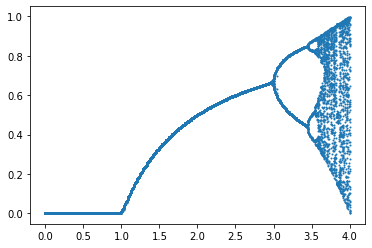

In [119]:
plt.scatter(x_all, y_all, s=1)
pass

<font color=red>-2 for magic numbers in function. Also none of your functions have docstrings.</font>

#### Run this when done

Once you have run this, do not make any more revisions. Submit your notebook to Sakai for grading. 

The cell below **must** be executed for grading. It must also be the **last** cell executed in this notebook.

In [120]:
elapsed = time.time() - start
elapsed // 60

62.0